In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 

In [2]:
data=pd.read_csv('nyc_taxi_trip_duration.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
pd.isnull(data).sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [4]:
print(data['trip_duration'].nlargest(5))
data.trip_duration<5

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
Name: trip_duration, dtype: int64


0         False
1         False
2         False
3         False
4         False
          ...  
729317    False
729318    False
729319    False
729320    False
729321    False
Name: trip_duration, Length: 729322, dtype: bool

In [5]:
data=data[data.trip_duration!=data.trip_duration.max()]
data=data[data.trip_duration!=data.trip_duration.min()]

In [6]:
data['trip_duration_hrs']=data['trip_duration']/3600
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hrs
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556


In [7]:
data=data[data.passenger_count<=6]
data=data[data.passenger_count!=0]

In [8]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [9]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hrs,pickup_day,dropoff_day,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111,Monday,Monday,2,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556,Friday,Friday,3,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167,Sunday,Sunday,2,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944,Tuesday,Tuesday,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556,Wednesday,Wednesday,2,2


## Calculating Distance from the given longitude and Latitude

In [10]:
from math import radians, cos, sin, asin, sqrt 
def distance(data): 
       
    lon1 = radians(data.pickup_longitude) 
    lon2 = radians(data.dropoff_longitude) 
    lat1 = radians(data.pickup_latitude)
    lat2 = radians(data.pickup_latitude) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))   
    r = 6371
    d=round(c*r,2)
    return d
data['distance'] = data.apply(lambda x: distance(x), axis = 1)

In [11]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hrs,pickup_day,dropoff_day,pickup_month,dropoff_month,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111,Monday,Monday,2,2,0.84
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556,Friday,Friday,3,3,0.54
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167,Sunday,Sunday,2,2,4.15
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944,Tuesday,Tuesday,1,1,0.41
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556,Wednesday,Wednesday,2,2,2.44


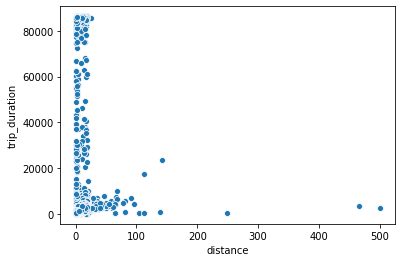

In [12]:
sns.scatterplot(x='distance',y='trip_duration',data=data)
x_lim=80000
y_lim=800

Here it is hard to define relation b/w distance and trip duration So we will perform log transformation to get clearer understanding.

### Log transformation of distance column

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


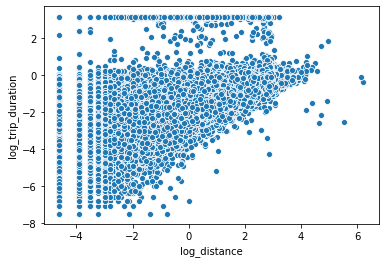

In [13]:
q=np.log(data.distance)
data['log_distance']=round(q,2)
data['log_trip_duration']=np.log(data.trip_duration_hrs)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=data)

#### Neglecting the data for trip duration greater than 2

In [14]:
data=data[data.log_trip_duration<2]

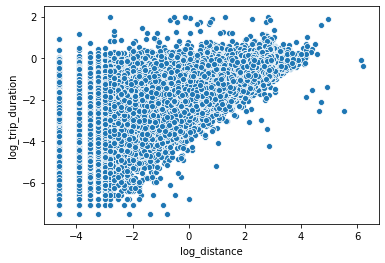

In [15]:
sns.scatterplot(x='log_distance',y='log_trip_duration',data=data)


In [16]:
data1=data.loc[:,['passenger_count','store_and_fwd_flag','trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
   'dropoff_month','distance']]

In [17]:
data1.head()

,passenger_count,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,distance
0,1,N,400,Monday,Monday,2,2,0.84
1,2,N,1100,Friday,Friday,3,3,0.54
2,2,N,1635,Sunday,Sunday,2,2,4.15
3,6,N,1141,Tuesday,Tuesday,1,1,0.41
4,1,N,848,Wednesday,Wednesday,2,2,2.44


In [18]:
data1.dtypes


passenger_count         int64
store_and_fwd_flag     object
trip_duration           int64
pickup_day             object
dropoff_day            object
pickup_month            int64
dropoff_month           int64
distance              float64
dtype: object

In [19]:
data1['store_and_fwd_flag'].astype('category')
data1['pickup_day'].astype('category')
data1['dropoff_day'].astype('category')

0            Monday
1            Friday
2            Sunday
3           Tuesday
4         Wednesday
            ...    
729317     Saturday
729318       Monday
729319       Friday
729320       Sunday
729321       Friday
Name: dropoff_day, Length: 728278, dtype: category
Categories (7, object): [Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday]

In [20]:
data1.isna().sum()

passenger_count       0
store_and_fwd_flag    0
trip_duration         0
pickup_day            0
dropoff_day           0
pickup_month          0
dropoff_month         0
distance              0
dtype: int64

In [21]:
data1=pd.get_dummies(data1,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month'])

In [22]:
data1.head()

,passenger_count,trip_duration,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,...,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7
0,1,400,0.84,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1100,0.54,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,1635,4.15,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,6,1141,0.41,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,848,2.44,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
data1.corr()

,passenger_count,trip_duration,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,...,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7
passenger_count,1.000000,0.014740,0.009566,0.020851,-0.020851,-0.001782,-0.008850,0.022535,0.016282,-0.009569,...,0.001951,0.000964,-0.002581,0.002606,-0.001707,-0.001208,0.001934,0.000977,-0.002544,-0.002357
trip_duration,0.014740,1.000000,0.658800,-0.028826,0.028826,0.020540,-0.015985,-0.037556,-0.044531,0.037427,...,0.006213,0.031500,0.036780,-0.030696,-0.031386,-0.013174,0.006344,0.031523,0.036654,0.009244
distance,0.009566,0.658800,1.000000,-0.031608,0.031608,-0.002767,0.017217,-0.020630,0.019925,-0.000076,...,-0.003184,0.009124,0.009943,-0.004302,-0.011281,-0.000630,-0.003001,0.009077,0.009949,0.005313
store_and_fwd_flag_N,0.020851,-0.028826,-0.031608,1.000000,-1.000000,-0.002791,-0.000582,0.002956,0.002697,-0.002877,...,-0.002325,0.002444,-0.001605,-0.001058,0.000949,0.001517,-0.002325,0.002500,-0.001662,0.000600
store_and_fwd_flag_Y,-0.020851,0.028826,0.031608,-1.000000,1.000000,0.002791,0.000582,-0.002956,-0.002697,0.002877,...,0.002325,-0.002444,0.001605,0.001058,-0.000949,-0.001517,0.002325,-0.002500,0.001662,-0.000600
pickup_day_Friday,-0.001782,0.020540,-0.002767,-0.002791,0.002791,1.000000,-0.163612,-0.179471,-0.167240,-0.178637,...,0.026977,-0.019757,-0.014821,0.032586,-0.006190,-0.017968,0.026977,-0.019800,-0.014784,-0.003417
pickup_day_Monday,-0.008850,-0.015985,0.017217,-0.000582,0.000582,-0.163612,1.000000,-0.162301,-0.151241,-0.161548,...,-0.012937,0.018614,-0.008832,-0.011949,0.030422,-0.015101,-0.012937,0.018571,-0.008798,-0.003090
pickup_day_Saturday,0.022535,-0.037556,-0.020630,0.002956,-0.002956,-0.179471,-0.162301,1.000000,-0.165901,-0.177207,...,0.040136,-0.015561,-0.014703,-0.000284,0.001115,-0.010983,0.039608,-0.015074,-0.014666,-0.003390
pickup_day_Sunday,0.016282,-0.044531,0.019925,0.002697,-0.002697,-0.167240,-0.151241,-0.165901,1.000000,-0.165130,...,-0.008544,0.027530,-0.013605,0.010246,-0.000774,-0.014534,-0.008544,0.027486,-0.013571,-0.003159
pickup_day_Thursday,-0.009569,0.037427,-0.000076,-0.002877,0.002877,-0.178637,-0.161548,-0.177207,-0.165130,1.000000,...,-0.018268,-0.017109,0.031301,-0.010789,-0.004392,0.018919,-0.017738,-0.017152,0.030849,0.019129


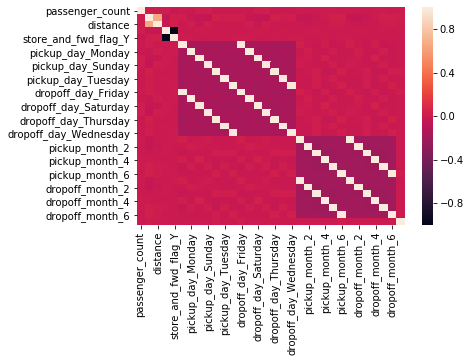

In [24]:
sns.heatmap(data1.corr())

# Creating model

In [25]:
x=data1.drop(['trip_duration'],axis=1)
y=data1['trip_duration']
x.shape,y.shape

((728278, 31), (728278,))

In [26]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.20,random_state =10)


In [27]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
lr=LR()
lr.fit(train_x,train_y)
#predicting over train set and calculation of error
train_predict=lr.predict(train_x)
k = np.sqrt(MSE(train_predict,train_y))
print('error in training data',k)

error in training data 501.9266451566458


In [28]:
test_predict=lr.predict(test_x)
k = np.sqrt(MSE(test_predict,test_y))
print('error in test data',k)

error in test data 482.5209109784997


Text(0.5, 1.0, 'Coeffecient plot')

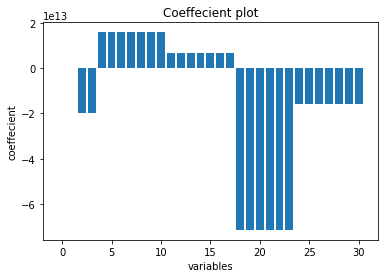

In [29]:
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel('variables')
plt.ylabel('coeffecient')
plt.title('Coeffecient plot')

In [30]:
residuals =pd.DataFrame({'fitted_value':test_y,
                        'predicted_value':test_predict},)
residuals['residuals']=residuals['fitted_value']-residuals['predicted_value']
residuals.head()



,fitted_value,predicted_value,residuals
685004,315,728.156250,-413.156250
671552,415,766.312500,-351.312500
335550,816,652.968750,163.031250
657564,14,530.187500,-516.187500
79402,441,830.984375,-389.984375


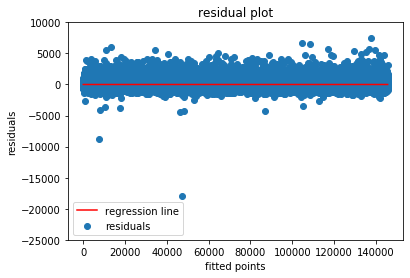

In [31]:
f=range(0,145656)
k=[0 for i in range(0,145656)]
plt.scatter(f,residuals.residuals[:],label='residuals')
plt.plot(f,k,color='red',label='regression line')
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('residual plot')
plt.ylim(-25000,10000)
plt.legend()